In [88]:
# imports
from skimage.color import rgb2gray
import skimage.transform
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
import skimage.exposure

In [89]:
# load images

lena = rgb2gray(imread('lena.tiff')).astype(np.float64) *255
cameraman = imread('cameraman.tif').astype(np.float64)
tire = imread('tire.tif').astype(np.float64) / 255.0


In [90]:
# Pt 2: PSNR

#input images
# np.sum
a = lena
b = lena

# cooper mse func
def mse(f, g):
#mse
	error = np.sum((f - g) ** 2)
	error /= float(f.shape[0] * g.shape[1])
	#return MSE
	return error

# cooper psnr func
def psnr(f, g):
	MAX_f = 255.0
	log = np.log10((MAX_f**2)/(mse(f, g))) 
	PSNR_out = 10*log
	return PSNR_out


print(mse(a, b))
print(psnr(a,b))

# COOPERS NOTE: this seems to work now
#Sarah's NOTE: not a fatal error but it is dividing by zero for some reason in this part: (MAX_f**2)/(mse(f, g))


0.0
inf


C:\Users\Cooper\AppData\Local\Temp\ipykernel_1732\3713649092.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  log = np.log10((MAX_f**2)/(mse(f, g)))


DOWN-SAMPLED IMAGES


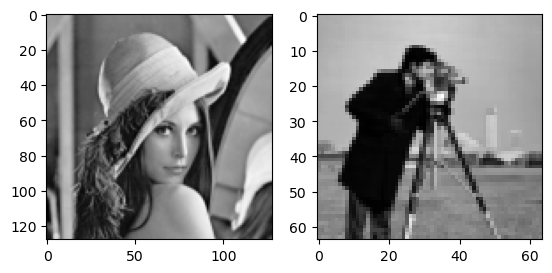

NEAREST NEIGHBOUR
Lena PSNR: 26.41
Cameraman PSNR: 21.63


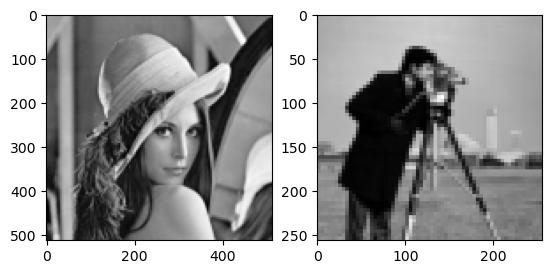

BILINEAR INTERPOLATION
Lena PSNR: 27.08
Cameraman PSNR: 21.92


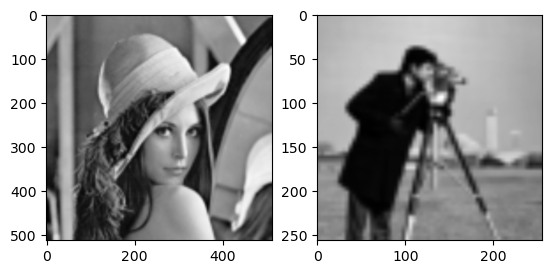

BI-CUBIC INTERPOLATION
Lena PSNR: 28.09
Cameraman PSNR: 22.49


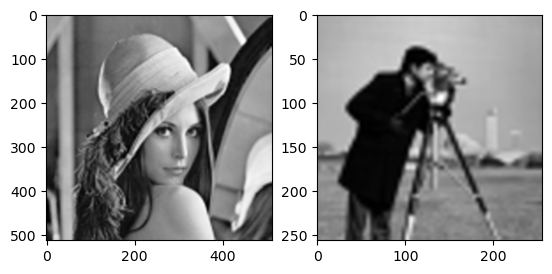

In [91]:
# Pt 3: digital zooming

# load lena and cameraman and convert to grayscale - done above

def plot_images(img1, img2):
    plt.subplot(1, 2, 1)
    plt.imshow(img1)
    plt.subplot(1, 2, 2)
    plt.imshow(img2)
    plt.show()


# reduce the resolution of the images by a factor of 4 in both the horizontal 
# and vertical direction using bilinear interpolation. Plot the down-sampled images
lena_ds = skimage.transform.rescale(lena, 0.25)
cameraman_ds = skimage.transform.rescale(cameraman, 0.25)

print("DOWN-SAMPLED IMAGES")
plot_images(lena_ds, cameraman_ds)

# perform digital zooming to increase the resolution of 
# the down-sampled image back to the resolution of the original images using nni, bli, bci
# plot the up-sample images, compute the PSNR between the originals and up-sampled

#nni
def nni(img):
    shape = img.shape[0]*4 , img.shape[1]*4
    return skimage.transform.resize(img, shape, 0)

print("NEAREST NEIGHBOUR")
print(f"Lena PSNR: {psnr(lena, nni(lena_ds)):.2f}")
print(f"Cameraman PSNR: {psnr(cameraman, nni(cameraman_ds)):.2f}")
plot_images(nni(lena_ds), nni(cameraman_ds))

#bli
def bli(img):
    shape = img.shape[0]*4 , img.shape[1]*4
    return skimage.transform.resize(img, shape, 1)

print("BILINEAR INTERPOLATION")
print(f"Lena PSNR: {psnr(lena, bli(lena_ds)):.2f}")
print(f"Cameraman PSNR: {psnr(cameraman, bli(cameraman_ds)):.2f}")
plot_images(bli(lena_ds), bli(cameraman_ds))

#bci
def bci(img):
    shape = img.shape[0]*4 , img.shape[1]*4
    return skimage.transform.resize(img, shape, 2)

print("BI-CUBIC INTERPOLATION")
print(f"Lena PSNR: {psnr(lena, bci(lena_ds)):.2f}")
print(f"Cameraman PSNR: {psnr(cameraman, bci(cameraman_ds)):.2f}")
plot_images(bci(lena_ds), bci(cameraman_ds))




In [92]:
# PT 4: Point Operations for Image Enhancement

# scale tire image